<h1>STEPS:</h1>
<ul>
<li>Importing the necessary libraries.<br></li>
<li>Accessing and importing the wine quality dataset.
<li>Analyzing and processing the data<br>
<li>Checking for null values.<br>
<li>Visualizing the data.<br>
<li>Splitting the data<br>
<li>Modelling<br>
<li>Implementing different classification approaches:<br>
   <ul>
       <li>Support Vector Machine</li>
        <li>Decision forest</li>
        <li>Random forest</li>
        <li>Logistic Regression</li>
    </ul>
<li>Conclusion<br>
</ul>



<h1>Importing the necessary libraries.</h1>

In [152]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

<h1>Accessing and importing the wine quality dataset.</h1>

In [189]:
#Importing the dataset and storing it in a dataframe 

data = pd.read_csv("archive/WineQT.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<h1>Analyzing and processing the data</h1>

In [190]:
#Listing the columns in our dataset

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [156]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<p>All columns have numeric data</p>

In [157]:
#Dropping the Id column since it is not necessary for this project

data.drop('Id', inplace=True, axis=1)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h1>Checking for null values.</h1>

In [158]:
#Checking for missing values 

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<p>There are no missing values in our data</p>

<h1>Data Visualization</h1>

<p>I compare the relationship between wine quality and all other columns using a whitegrid</p>

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

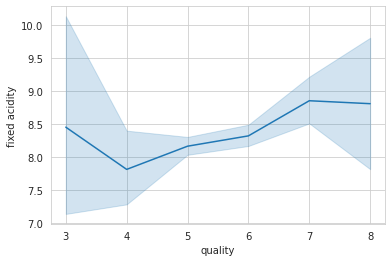

In [159]:
#Wine quality vs Fixed Acidity

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="fixed acidity")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

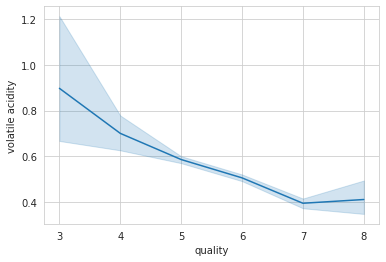

In [160]:
#Wine quality vs volatile Acidity

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="volatile acidity")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

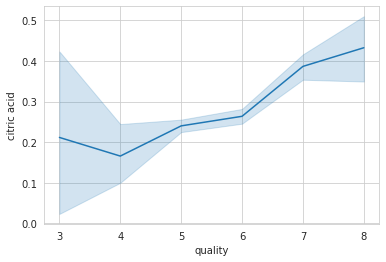

In [161]:
#Wine quality vs citric acid

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="citric acid")

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

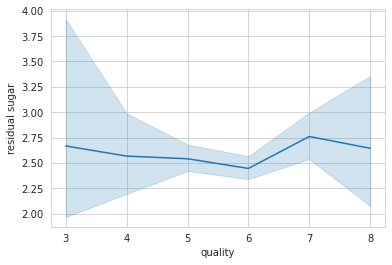

In [162]:
#Wine quality vs residual sugar

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="residual sugar")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

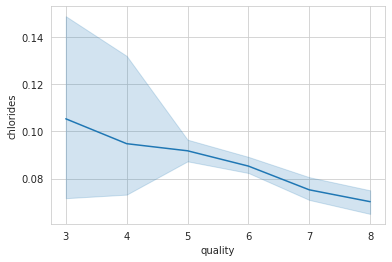

In [163]:
#Wine quality vs chlorides

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="chlorides")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

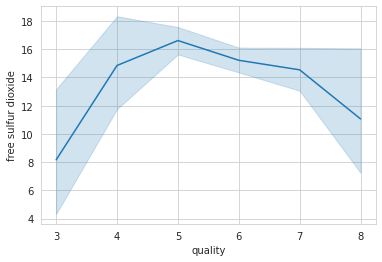

In [164]:
#Wine quality vs free sulphur dioxide

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="free sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

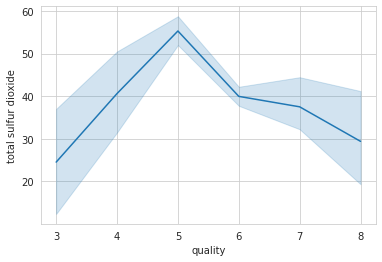

In [165]:
#Wine quality vs total sulfur dioxide

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="total sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='density'>

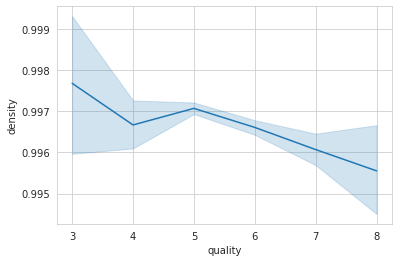

In [166]:
#Wine quality vs density

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="density")

<AxesSubplot:xlabel='quality', ylabel='pH'>

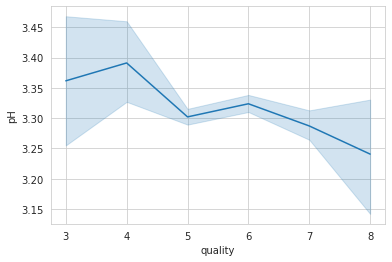

In [167]:
#Wine quality vs pH

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="pH")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

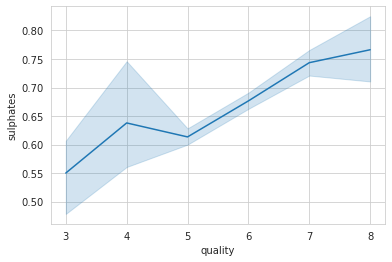

In [168]:
#Wine quality vs sulphates

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="sulphates")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

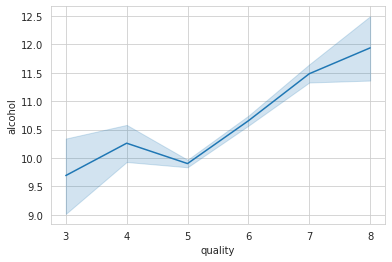

In [169]:
#Wine quality vs alcohol

sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="alcohol")

<h3>CONCLUSION</h3>
<ul>
    <li>The quality of the wine increases with increase in alcohol, sulphates, volatile acidity and citric acid composition.</li>
    <li>The composition of chloride and volatile acidity decreases with the increase in wine quality</li>
    <li>Alcohol has the highest effect in wine quality</li>
</ul>

<h1>Feature Scaling.</h1>

<h2>1.Normalization</h2>
<p>Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.</p>

<AxesSubplot:xlabel='quality', ylabel='count'>

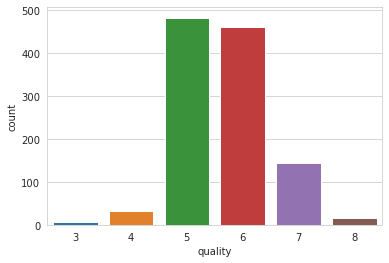

In [170]:
#Ploting quality column to see how it is distributed

sns.countplot(x = 'quality', data=data)

In [171]:
#Converting half the data to bad (5 and below) and the remaining half to good(above 5)

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


<AxesSubplot:xlabel='quality', ylabel='count'>

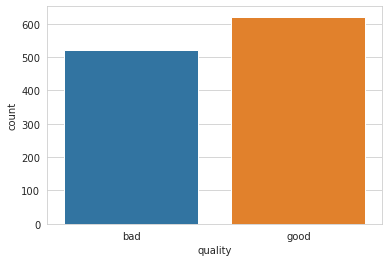

In [172]:
#Plotting the quality column

sns.countplot(x = 'quality', data=data)

In [173]:
#Normalizing the labels
#Encoding quality column with value between 0(bad) and 1(good).

labelencoder = LabelEncoder()
data['quality'] = labelencoder.fit_transform(data['quality'])

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<h1>Splitting the data</h1>

In [174]:
# dividing the dataset into dependent and independent variables to determine the causal effect
#Quality is depedent on all the other 11 columns

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1143, 11)
(1143,)


In [175]:
# dividing the data into train(for model training) and test(for model prediction) datasets. 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(857, 11)
(857,)
(286, 11)
(286,)


<h2>2.Standardization</h2>
<p>Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.</p>

In [176]:
# standardization

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<h1>MODELLING</h1>

<h1>Support vector machine</h1>

In [177]:
#Create the model
model = SVC()
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("svm Training accuracy :", model.score(x_train, y_train))
print("svm Testing accuracy :", model.score(x_test, y_test))

svm Training accuracy : 0.809801633605601
svm Testing accuracy : 0.7552447552447552


In [178]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)

In [179]:
grid_svc.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [180]:
grid_svc.best_params_


{'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}

In [181]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       119
           1       0.82      0.73      0.77       167

    accuracy                           0.75       286
   macro avg       0.75      0.76      0.75       286
weighted avg       0.76      0.75      0.75       286



<h1>Decision Forest</h1>

In [182]:
# creating model
model = DecisionTreeClassifier()
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7097902097902098


In [183]:
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       119
           1       0.77      0.71      0.74       167

    accuracy                           0.71       286
   macro avg       0.70      0.71      0.71       286
weighted avg       0.72      0.71      0.71       286

[[ 84  35]
 [ 48 119]]


<h1>Random Forest</h1>

In [184]:
# creating the model
model = RandomForestClassifier(n_estimators = 200)
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7937062937062938


In [185]:
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       119
           1       0.86      0.78      0.82       167

    accuracy                           0.79       286
   macro avg       0.79      0.80      0.79       286
weighted avg       0.80      0.79      0.79       286

[[ 97  22]
 [ 37 130]]


<h1>Logistic Regression</h1>

In [186]:
# creating the model
model = LogisticRegression()
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.7677946324387398
Testing accuracy : 0.7342657342657343


In [187]:
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       119
           1       0.80      0.72      0.76       167

    accuracy                           0.73       286
   macro avg       0.73      0.74      0.73       286
weighted avg       0.74      0.73      0.74       286

[[ 89  30]
 [ 46 121]]


<h1>Conclusion</h1>

<p>Random forest has the the highest accuracy for both the test and train data sets, followed by decision forest</p>
<p>Hence Random forest is the best model to use for predicion of wine quality</p>